# Statistical Analysis

In [63]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, sem
from scipy.stats import t
from scipy.stats import pearsonr
from scipy.stats import spearmanr 

In [43]:
# Load the cleaned data frame from previous Notebook 
df=pd.read_pickle("df.pkl")

In [44]:
df

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_status,participant_type,sources,state_house_district,state_senate_district,year,month,monthday,weekday,loss
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,2013,1,1,1,4
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62,35,2013,1,1,1,4
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56,13,2013,1,1,1,4
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40,28,2013,1,5,5,4
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62,27,2013,1,7,0,4
5,478948,2013-01-07,Oklahoma,Tulsa,6000 block of South Owasso,4,0,http://www.gunviolencearchive.org/incident/478948,http://usnews.nbcnews.com/_news/2013/01/07/163...,False,...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.kjrh.com/news/local-news/4-found-sh...,72,11,2013,1,7,0,4
6,479363,2013-01-19,New Mexico,Albuquerque,2806 Long Lane,5,0,http://www.gunviolencearchive.org/incident/479363,http://hinterlandgazette.com/2013/01/pastor-gr...,False,...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cbsnews.com/news/nehemiah-gringo-ca...,10,14,2013,1,19,5,5
7,479374,2013-01-21,Louisiana,New Orleans,LaSalle Street and Martin Luther King Jr. Boul...,0,5,http://www.gunviolencearchive.org/incident/479374,http://www.nola.com/crime/index.ssf/2013/01/no...,False,...,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.huffingtonpost.com/2013/01/21/new-o...,93,5,2013,1,21,0,5
8,479389,2013-01-21,California,Brentwood,1100 block of Breton Drive,0,4,http://www.gunviolencearchive.org/incident/479389,http://sanfrancisco.cbslocal.com/2013/01/22/4-...,False,...,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.contracostatimes.com/ci_22426767/br...,11,7,2013,1,21,0,4
9,492151,2013-01-23,Maryland,Baltimore,1500 block of W. Fayette St.,1,6,http://www.gunviolencearchive.org/incident/492151,http://www.abc2news.com/news/crime-checker/bal...,False,...,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://articles.baltimoresun.com/2013-08-25/ne...,NaN,44,2013,1,23,2,7


In [16]:
# Calculating the mean for specific rows:

print("Average number of people killed due to gun violence:", np.mean(df.n_killed))

print("Average number of people injured due to gun violence:", np.mean(df.n_injured))

Average number of people killed due to gun violence: 0.2525346506562972
Average number of people injured due to gun violence: 0.4960446932968399


In [21]:
# Calculating the Standard Deviation using Bessel's Correction:

print("Std Deviation of number of people killed:", np.std(df.n_killed,ddof=1))

print("Std Deviation of number of people injured:",np.std(df.n_injured,ddof=1))

Std Deviation of number of people killed: 0.5353986977010371
Std Deviation of number of people injured: 1.2363209070342582


In [22]:
killed= norm.rvs(0.2525346506562972, 0.5353986977010371, size=239678)

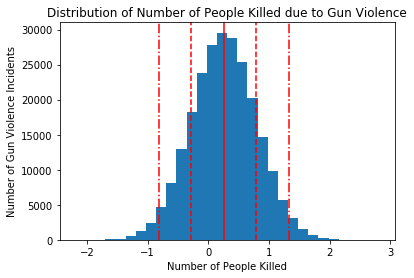

In [24]:
_ = plt.hist(killed, bins=30)
_ = plt.xlabel('Number of People Killed')
_ = plt.ylabel('Number of Gun Violence Incidents')
_ = plt.title('Distribution of Number of People Killed due to Gun Violence')
_ = plt.axvline(0.2525346506562972, color='r')
_ = plt.axvline(0.2525346506562972+0.5353986977010371, color='r', linestyle='--')
_ = plt.axvline(0.2525346506562972-0.5353986977010371, color='r', linestyle='--')
_ = plt.axvline(0.2525346506562972+(0.5353986977010371*2), color='r', linestyle='-.')
_ = plt.axvline(0.2525346506562972-(0.5353986977010371*2), color='r', linestyle='-.')

In [31]:
# Calculating the probability of a gun shooting incident resulting in more than 5 people dead:
norm.cdf(x=6, loc=0.2525346506562972, scale= 0.5353986977010371)

1.0

In [45]:
df.describe()

,n_killed,n_injured,n_guns_involved,year,month,monthday,weekday,loss
count,239678.000000,239678.000000,140227.000000,239678.000000,239678.000000,239678.000000,239678.000000,239678.000000
mean,0.252535,0.496045,1.372767,2015.711634,6.351801,15.773726,3.058854,0.748579
std,0.535399,1.236321,4.679772,1.225870,3.447657,8.831962,2.023118,1.399670
min,0.000000,0.000000,1.000000,2013.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2015.000000,3.000000,8.000000,1.000000,0.000000
50%,0.000000,0.000000,1.000000,2016.000000,6.000000,16.000000,3.000000,1.000000
75%,0.000000,1.000000,1.000000,2017.000000,9.000000,23.000000,5.000000,1.000000
max,59.000000,489.000000,400.000000,2018.000000,12.000000,31.000000,6.000000,548.000000


In [52]:
from io import StringIO

ownership = StringIO("""Rank,state,guns_per_capita,guns_registered
1,Wyoming,229.24,132806
2,Washington D.C.,68.05,47228
3,New Hampshire,46.76,64135
4,New Mexico,46.73,97580
5,Virginia,36.34,307822
6,Alabama,33.15,161641
7,Idaho,28.86,49566
8,Arkansas,26.57,79841
9,Nevada,25.64,76888
10,Arizona,25.61,179738
11,Louisiana,24.94,116831
12,South Dakota,24.29,21130
13,Utah,23.48,72856
14,Connecticut,22.96,82400
15,Alaska,21.38,15824
16,Montana,21.06,22133
17,South Carolina,21.01,105601
18,Texas,20.79,588696
19,West Virginia,19.42,35264
20,Pennsylvania,18.45,236377
21,Georgia,18.22,190050
22,Kentucky,18.2,81068
23,Oklahoma,18.13,71269
24,Kansas,18.06,52634
25,North Dakota,17.56,13272
26,Indiana,17.1,114019
27,Maryland,17.03,103109
28,Colorado,16.48,92435
29,Florida,16.35,343288
30,Ohio,14.87,173405
31,North Carolina,14.818,152238
32,Oregon,14.816,61383
33,Tennessee,14.76,99159
34,Minnesota,14.22,79307
35,Washington,12.4,91835
36,Missouri,11.94,72996
37,Mississippi,11.89,35494
38,Nebraska,11.57,22234
39,Maine,11.5,15371
40,Illinois,11.44,146487
41,Wisconsin,11.19,64878
42,Vermont,9.41,5872
43,Iowa,9.05,28494
44,California,8.71,344622
45,Michigan,6.59,65742
46,New Jersey,6.38,57507
47,Hawaii,5.5,7859
48,Massachusetts,5.41,37152
49,Delaware,5.04,4852
50,Rhode Island,3.98,37152
51,New York,3.83,76207""")

ownership = pd.read_csv(ownership)

states_df = df[df['year'] == 2017]['state'].value_counts()
statesdf = pd.DataFrame()
statesdf['state'] = states_df.index
statesdf['counts'] = states_df.values
statesdf = statesdf.merge(ownership, on='state')

In [54]:
statesdf.head()

,state,counts,Rank,guns_per_capita,guns_registered
0,Illinois,5089,40,11.44,146487
1,California,4588,44,8.71,344622
2,Florida,4156,29,16.35,343288
3,Texas,2875,18,20.79,588696
4,Ohio,2701,30,14.87,173405


In [62]:
corr,_=pearsonr(statesdf['counts'],statesdf['guns_registered'])
print('Pearsons Correlation:' % corr,_)

Pearsons Correlation: 1.0997367223475283e-07


In [65]:
corr,_=pearsonr(statesdf['counts'],statesdf['guns_per_capita'])
print('Pearsons Correlation:' % corr,_)

Pearsons Correlation: 0.18456733833555883
